![Plane departing the Pacific Northwest](IMG_8801.JPG)

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

In [83]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# loading the datasets
flights2022 = pd.read_csv("flights2022.csv")
flights_weather2022 = pd.read_csv("flights_weather2022.csv")

# creating routes column
flights2022["route"] = flights2022["origin"] + "-" + flights2022["dest"]

# average departure delays and cancellations by route
routes_delays_cancels = flights2022.groupby("route").agg(mean_dep_delay = ("dep_delay", "mean"), total_cancellations = ("dep_time", lambda x: x.isna().sum())).reset_index() 

# average departure delays and cancellations by airline
airlines_delays_cancels = flights2022.groupby("airline").agg(mean_dep_delay = ("dep_delay", "mean"), total_cancellations = ("dep_time", lambda x: x.isna().sum())).reset_index() 

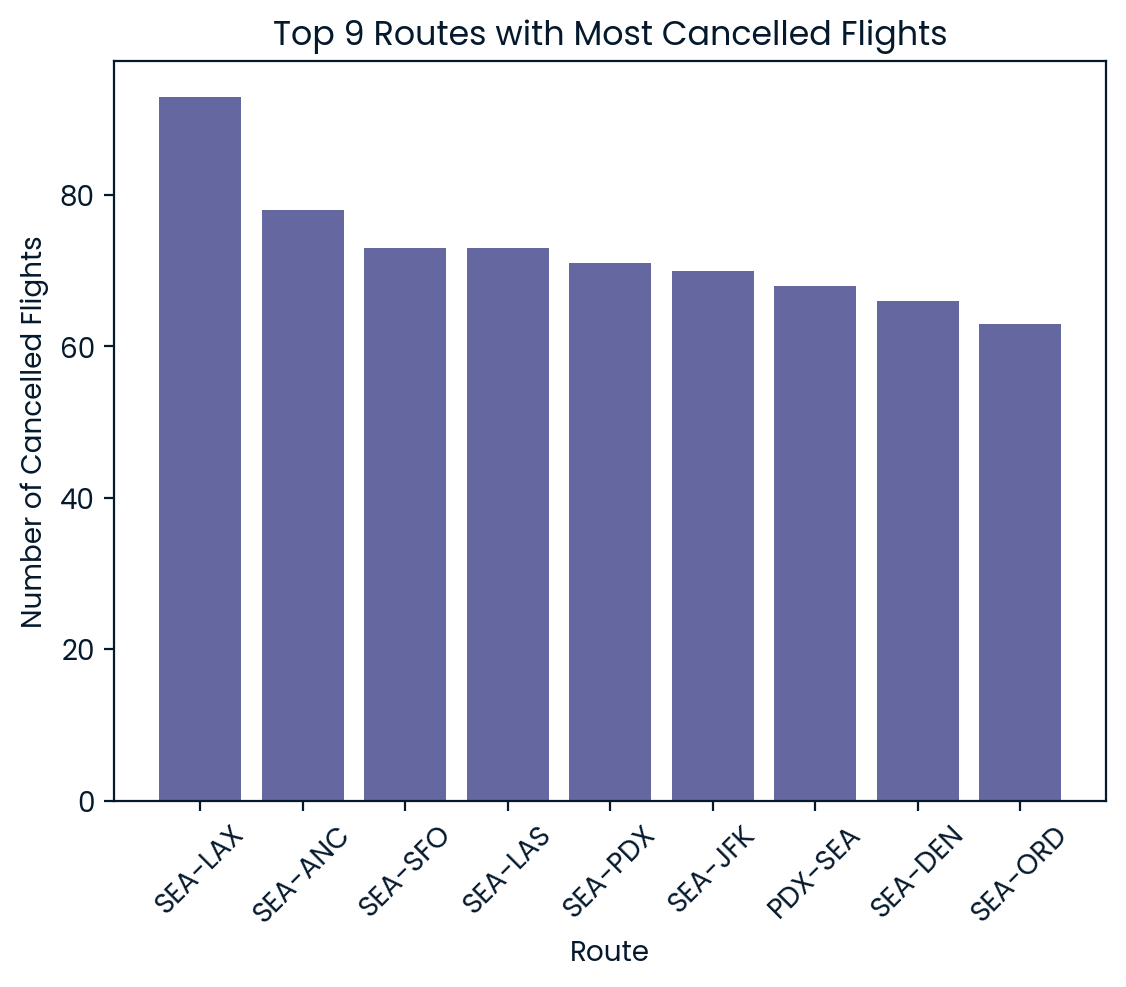

In [84]:
# top 9 route cancellations 
top_routes_by_cancellations = routes_delays_cancels.sort_values(by="total_cancellations", ascending=False).head(9)
top9_route_cancels_bar, ax = plt.subplots()
ax.bar(top_routes_by_cancellations["route"], top_routes_by_cancellations["total_cancellations"])
ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=45)
ax.set_xlabel("Route")
ax.set_ylabel("Number of Cancelled Flights")
ax.set_title("Top 9 Routes with Most Cancelled Flights")
plt.show()

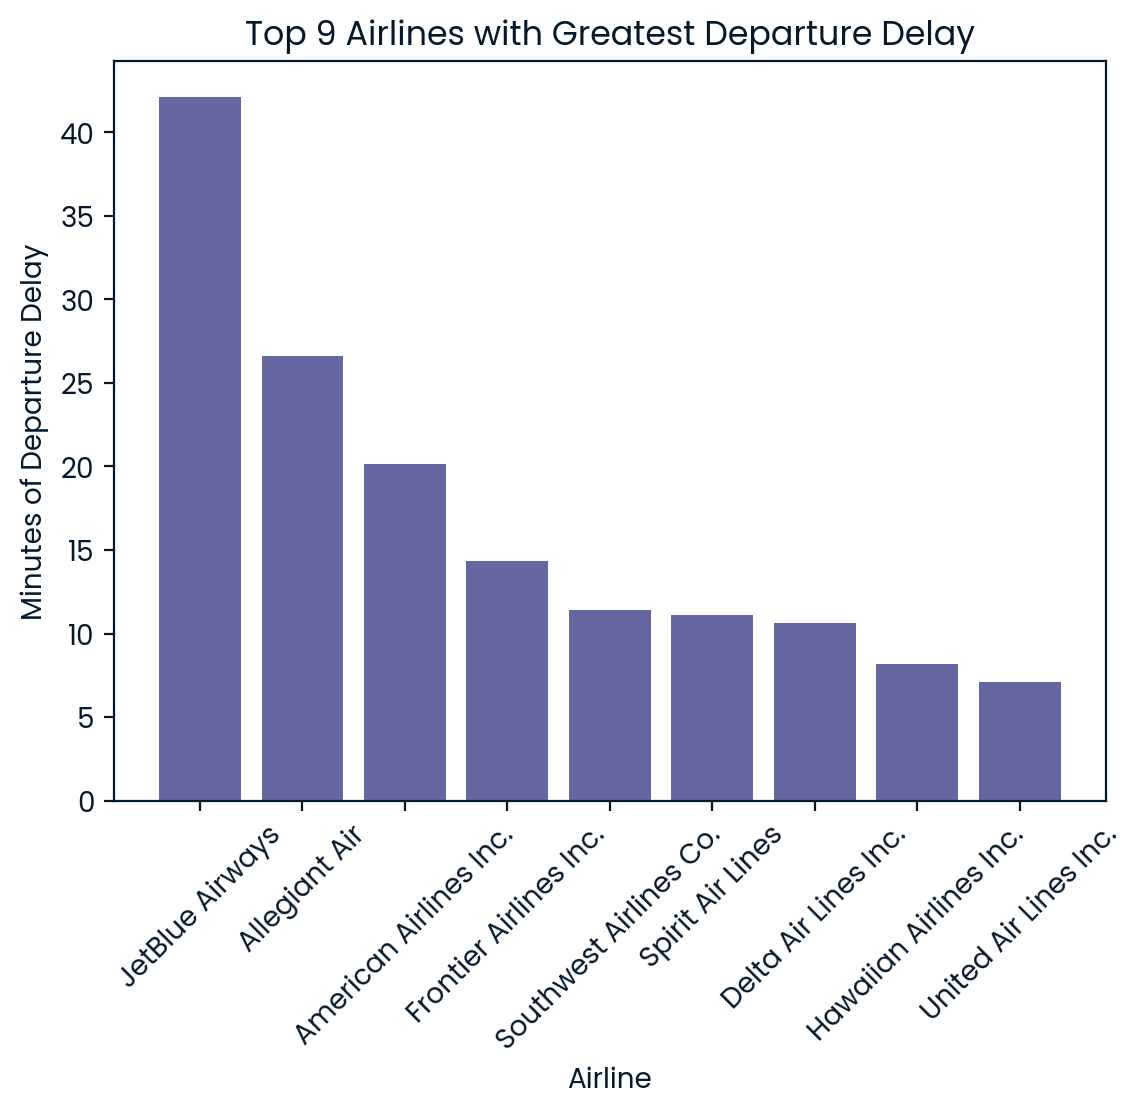

In [85]:
# top 9 airlines delay 
top_airlines_by_delay = airlines_delays_cancels.sort_values(by="mean_dep_delay", ascending=False).head(9)
top9_airline_delays_bar, ax = plt.subplots()
ax.bar(top_airlines_by_delay["airline"], top_airlines_by_delay["mean_dep_delay"])
ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=45)
ax.set_xlabel("Airline")
ax.set_ylabel("Minutes of Departure Delay")
ax.set_title("Top 9 Airlines with Greatest Departure Delay")
plt.show()

In [86]:
# effect of wind gust
flights_weather2022["wind_gust_group"] = flights_weather2022["wind_gust"].apply(lambda x: ">=10" if x >= 10 else "<10")
wind_gust_delay = flights_weather2022.groupby(["origin", "wind_gust_group"]).agg(mean_dep_delay=("dep_delay", "mean"))
wind_response = True